Tugas tipe 2: Regresi (dataset: autos MPG) - Boosting

Dikerjakan oleh:
* 1301218598 - Mohammad Andiez Satria Permana
* 1301218603 - HNW Syahuda Nahatmasuni
* 1301218601 - Wandi Yusuf Kurniawan

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

In [21]:
data = pd.read_csv('autos_mpg.csv') # diimport dahulu ke files
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [23]:
data['horsepower'] = pd.to_numeric(data.horsepower, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [24]:
data.dropna(axis=0, inplace=True)
# data['horsepower'].fillna((data.horsepower.mean()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [25]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


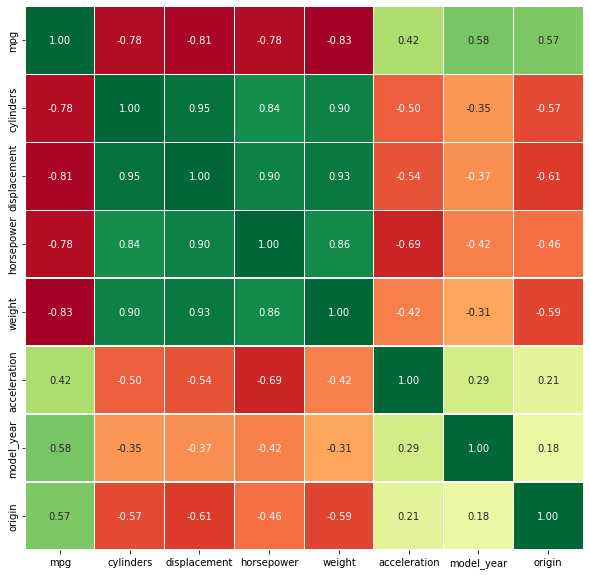

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.2f', linewidth=0.2, cmap='RdYlGn')

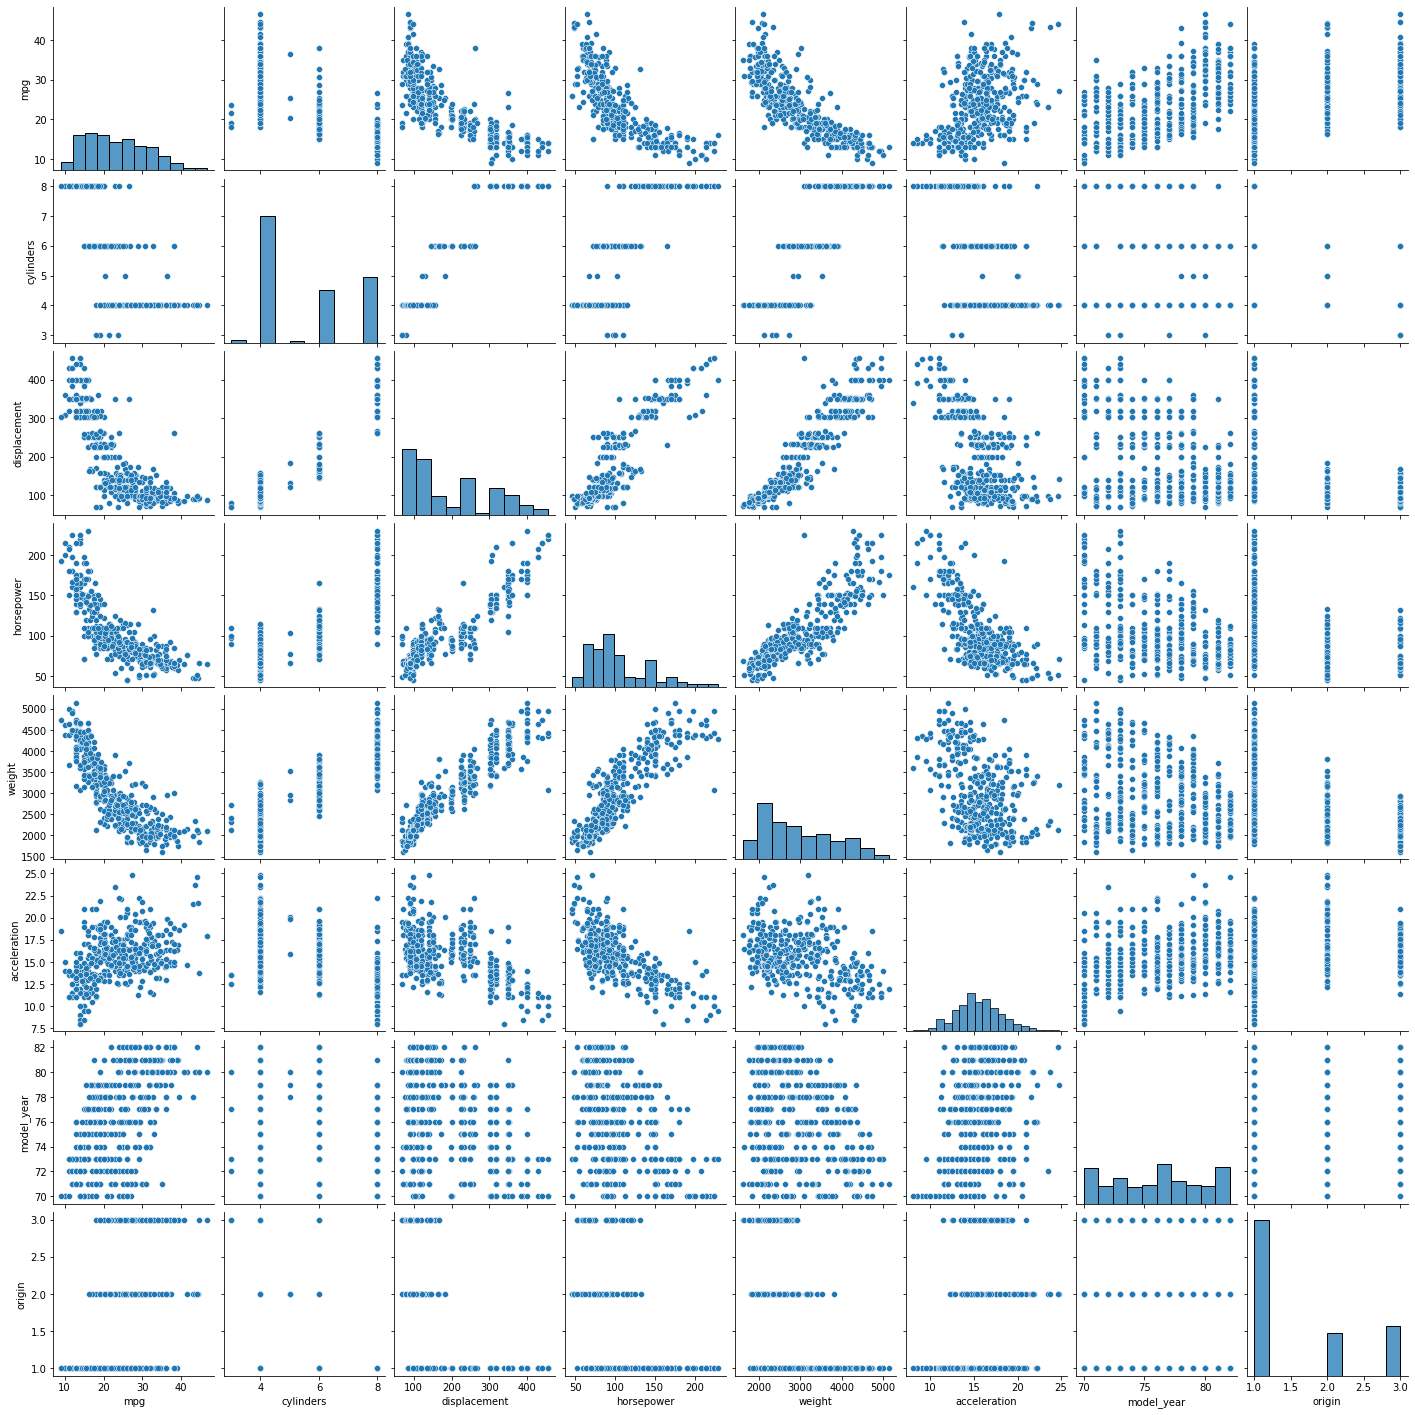

In [27]:
# sns.pairplot(data, x_vars=data.drop(['car_name','mpg'], axis=1, inplace=False).columns, y_vars= ['mpg'])
sns.pairplot(data)

In [28]:
X = data.drop(['car_name','mpg'], axis=1, inplace=False)
y = data['mpg']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [30]:
svm = SVR(kernel = 'rbf')
svm.fit(X_train_std, y_train)

SVR()

In [31]:
y_pred_svm = svm.predict(X_test_std)
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_svm)))
print("Train Score {:.2f} & Test Score {:.2f}".format(svm.score(X_train_std,y_train),svm.score(X_test_std,y_test)))

Mean Squared Error: 3.045296992609655
Train Score 0.86 & Test Score 0.82


Text(0.5, 0, 'Permutation Importance')

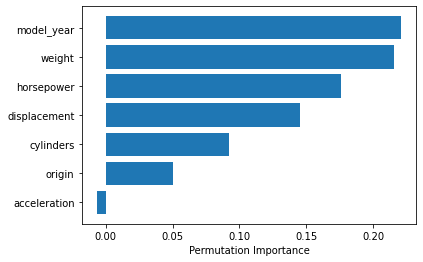

In [32]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(svm, X_test_std, y_test)

features = np.array(X.columns)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
# print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""SVM Regressor \t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_svm)),
#             mean_squared_error(y_test, y_pred_svm),
#             mean_absolute_error(y_test, y_pred_svm),
#             r2_score(y_test, y_pred_svm)))

# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred_svm)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("SVM Regressor")
# plt.show()

In [ ]:
# rf = RandomForestRegressor()
# rf.fit(X_train_std, y_train)

In [ ]:
# y_pred_rf = rf.predict(X_test_std)
# print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
# print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train_std,y_train),rf.score(X_test_std,y_test)))

In [ ]:
# plt.figure(figsize=(8,6))
# feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Important Features (Random Forest Regressor)")
# plt.legend()
# plt.show()

In [ ]:
# print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
#             mean_squared_error(y_test, y_pred_rf),
#             mean_absolute_error(y_test, y_pred_rf),
#             r2_score(y_test, y_pred_rf)))

# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred_rf)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Random Forest Regressor")
# plt.show()

In [45]:
params = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 
              'max_depth': [3, 5, 7, 9, 12, 16, 20],
              'n_estimators': [100, 150, 200, 250, 300, 400, 500, 600, 750, 1000],
              'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],}

xgb_model = XGBRegressor(random_state=42)
grid_obj_xgb = RandomizedSearchCV(xgb_model, params, cv=5, n_iter=10, scoring='neg_mean_absolute_error', verbose=3, n_jobs=12)
grid_obj_xgb.fit(X_train_std, y_train, verbose=1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=42), n_jobs=12,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'max_depth': [3, 5, 7, 9, 12, 16, 20],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 400, 500, 600,
                                                         750, 1000],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1]},
                   scoring='neg_mean_absolute_error', verbose=3)

In [39]:
y_pred_test = grid_obj_xgb.predict(X_test_std)
print('Best Parameters:\n', grid_obj_xgb.best_params_)
print('\nBest Score:', grid_obj_xgb.best_score_)

Best Parameters:
 {'subsample': 0.3, 'objective': 'reg:squarederror', 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'booster': 'gbtree'}

Best Score: -2.15884480517886


In [40]:
xgb = XGBRegressor(subsample = 0.1,
                   objective = 'reg:squarederror',
                   n_estimators = 1000,
                   max_depth = 12,
                   learning_rate = 0.01,
                   booster = 'gbtree')
xgb.fit(X_train_std, y_train)

XGBRegressor(learning_rate=0.01, max_depth=12, n_estimators=1000,
             objective='reg:squarederror', subsample=0.1)

In [41]:
y_pred_xgb = xgb.predict(X_test_std)
print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train_std,y_train),xgb.score(X_test_std,y_test)))

Mean Squared Error: 2.3971259969814054
Train Score 0.94 & Test Score 0.89


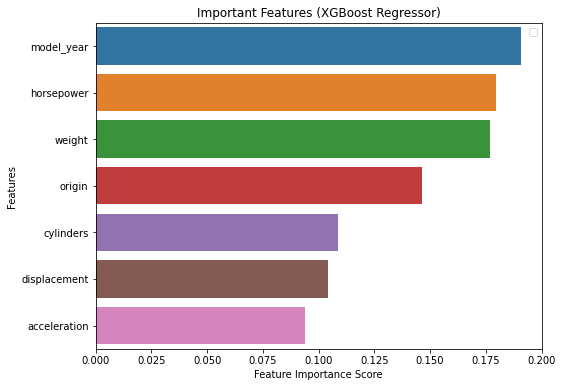

In [42]:
plt.figure(figsize=(8,6))
feature_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features (XGBoost Regressor)")
plt.legend()
plt.show()

In [ ]:
# print("Model \t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""XGBoost Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
#             mean_squared_error(y_test, y_pred_xgb),
#             mean_absolute_error(y_test, y_pred_xgb),
#             r2_score(y_test, y_pred_xgb)))

# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred_xgb)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# plt.xlabel("Actual")
# plt.ylabel("True")
# plt.title("XGBoost Regressor")

# plt.show()

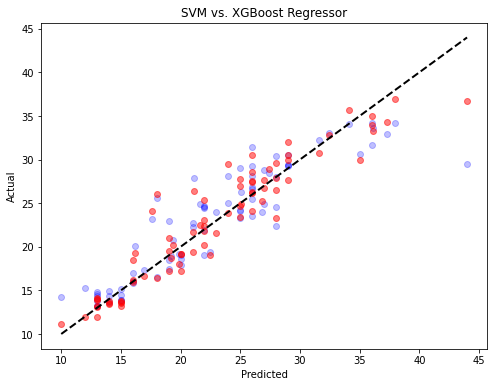

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svm, c='b', alpha=0.25)
plt.scatter(y_test, y_pred_xgb, c='r', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM vs. XGBoost Regressor")
plt.show()